In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### Task 1: (30% of credit)
#### (1) Consider the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

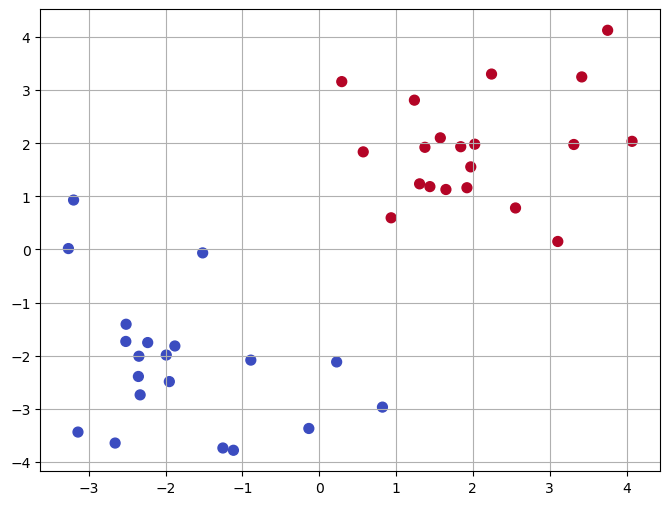

In [2]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

### Reference

[1] *Chapter 5*, *Support Vector Machines, Hands_On_Machine_Learning_with_Scikit_Learn_and_TensorFlow*: https://www.clc.hcmus.edu.vn/wp-content/uploads/2017/11/Hands_On_Machine_Learning_with_Scikit_Learn_and_TensorFlow.pdf

[2] *05_support_vector_machines.ipynb*, GitHub of *Hands_On_Machine_Learning_with_Scikit_Learn_and_TensorFlow*: https://github.com/ageron/handson-ml2


#### Solution:

1.
(a).

First, we need to import the correspodning libraries for the SVM algorithm. After careful considerations, our first choice is the `SVC` class from the `svm` class under the Python's `sklearn` package. The reasons we chose the `SVC` class directly instead of `LinearSVC` are that `SVC` is kernalized, meaning we could directly obtain its support vectors attributes through `support_vectors_`, even though it has the potential issue of downgrading time efficiency given large datasets (but not a problem in this setting since the dataset above only has 40 instances).

(*Please note that we want to obtain the same result after each running, so we set `random_state = 42` to achieve this. We can actually set this hyperparameter to be any value since all we want is just the fixed result, but if we change this value each time, we will get different fixed results as expected (just keep in mind).*)


In [3]:
# Step 1: Model Preparation
from sklearn.svm import SVC

svc1 = SVC(kernel = "linear", C = 100000, random_state = 42)
mod1 = svc1.fit(X, Y)

This time is for us to actually get the hyperplane equation required by the question [1]. The hyperplane formula is 

`x1 = -w0/w1 * x0 - b/w1` (1)

which is derived at the decision boundary `w0*x0 + w1*x1 + b = 0` (2).

(*Note that in this case the function `hyperplane` consider two conditions, the first one considers `mod`'s type is actually a `Pipeline`, while the other regards it as a usual `SVC` class (or `SVR`, or any other model which can directly specified by the model names, instead of a series of data preprocessing and the final model application, and which has `coef_` and `intercept_` attributes). Even though this condition is useless in this problem setting, it is still a good habit of considering multiple cases of inputs of the function, since in the future the feature engineering is important in machine learning, and using `Pipeline` is common when handing data as a result.*)

In [4]:
# Report the hyperplance: hyperplane1 = -w[0]/w[1] * x1 - b/w[1]
## Step 2: Create a function to achieve this automatically
def hyperplane(mod, class_name = None):
    """
    Input: mod (model: either a class or a Pipeline); class_name (the name for the class used in the Pipeline if 
    mod's type is Pipeline)
    Output: a list of hyperplane parameters and the report of the hyperplane
    Function: Take the model (SVC or Pipeline assumed) and its class_name if applicable, calculate the parameters of 
    the model's hyperplane and output the hyperplane's parameters and its mathematical equation (line).
    """
    ### Conditional statement: if "mod" is actually a Pipeline (i.e., "class_name != None"), execute the first
    ### conditional results; otherwise the second ones.
    if class_name:
        #### Obtaining w and b for (1)
        w = mod.named_steps[class_name].coef_[0]
        b = mod.named_steps[class_name].intercept_[0]
     
    else: 
        #### Obtaining w and b for (1)
        w = mod.coef_[0]
        b = mod.intercept_[0]
        
    ### Calculate the coefficients for the hyperplane and display it as a mathematical formula in strings
    coef1, coef0 = -w[0]/w[1], -b/w[1]
    
    ### Get a report for the hyperplane
    hyper_plane_str = "The hyperplane is {:.4f} * x0 - {:.4f}.".format(coef1, -coef0)
    
    ### Obtain a list of hyperplane parameters (indexes 0 and 1) and the report of the hyperplane (index 2), 
    ### which is useful for later use for the latter calculation(s) for the decision boundary given new instances.
    return [coef1, coef0, hyper_plane_str]

## Step 3: Call the "hyperplane_report(...)" function directly to get the hyperplane report
print(hyperplane(mod = mod1)[2])

The hyperplane is -1.1769 * x0 - 0.0767.


(b).

In this case, the margin is calculated as:

`1 / w1` [2].

(*Note that in this case, the function `hyperplane` also takes two conditions, the reasons being the same as ones for the function `hyperplane` above.*)

In [5]:
# Calculate the corresponding margin
## Step 1: Create a function to calculate the margin
def calculate_margin(mod, class_name = None):
    """
    Input: mod (model: either a class or a Pipeline); class_name (the name for the class used in the Pipeline if 
    mod's type is Pipeline)
    Output: margin
    Function: Take the model (SVC or Pipeline assumed) and its class_name if applicable, calculate its corresponding 
    margin, and return it.
    """
    ### Conditional statement: if "mod" is actually a Pipeline (i.e., "class_name != None"), execute the first
    ### conditional results; otherwise the second ones.
    if class_name:
        #### Obtaining w for (1)
        w = mod.named_steps[class_name].coef_[0]
     
    else: 
        #### Obtaining w for (1)
        w = mod.coef_[0]
        
    ### Calculate the margin     
    margin = 1/ w[1]
    
    return margin

In [6]:
## Step 2: Report the margin
print("The corresponding margin is {:.4f}.".format(calculate_margin(mod1)))

The corresponding margin is 1.7743.


(c).

For this particular question, we can use the `support_vectors_` attribute directly to obtain the support vectors, which is the data points at the boundary of the street modeled by SVMs.

In [7]:
# Get the support vectors
## Step 1: Create a function to obtain the support vectors
def support_vectors(mod, class_name = None):
    """
    Input: mod (model: either a class or a Pipeline); class_name (the name for the class used in the Pipeline if 
    mod's type is Pipeline)
    Output: support vectors
    Function: Take the model (SVC or Pipeline assumed) and its class_name if applicable, calculate its corresponding 
    support vectors, and return them.
    """
    ### Conditional statement: if "mod" is actually a Pipeline (i.e., "class_name != None"), execute the first
    ### conditional results; otherwise the second ones.
    if class_name:
        #### Get the support vectors
        support_vectors = mod.named_steps[class_name].support_vectors_
    else:
        #### Get the support vectors
        support_vectors = mod.support_vectors_
    
    ### Return a list containing support_vectors in numpy.array form (first entry: index 0) and in pandas.DataFrame
    ### form (second entry: index 1), which will be convenient for latter graphing 
    return [support_vectors, pd.DataFrame(support_vectors, columns = ["x1", "x2"])]

In [8]:
## Step 2: List the support vectors
support_vectors(mod1)[1]

,x1,x2
0,0.226275,-2.118110
1,-1.518036,-0.063994
2,0.935646,0.596936


2.Plot

In this case, we define a function `linear_plot` to graph the dataset, decision boundary (separating line), margins, and support vectors altogether. In this case, `linear_plot` call all of the previous function defined to achieve the task easier.

In [9]:
# Plot the results of SVC's classifications altogether
## Step 1: Define a function plotting the results
def linear_plot(x, y, mod, class_name = None, loc="lower left"):
    """
    Input: x & y (original dataset); mod (model: either a class or a Pipeline) class_name (the name for the class
    used in the Pipeline if mod's type is Pipeline); loc(a string type variable indicating the location of the
    legend in the final graph)
    Output: None
    Function: Take the model (SVC or Pipeline assumed), the original dataset, and its class_name if applicable, 
    plot the classification result of the trained linear SVM so far.
    """
    ### Specify x0 in this case
    x_min, x_max = np.min(x.min()), np.max(x.max())
    x0 = np.linspace(x_min - 1, x_max + 1, 100)
    
    ### Calculate a series of parameters, decision boundary, margin, upper bound, lower bound, and 
    ### support vectors (i.e., named "sup_vecs") in this case
    coef1 = hyperplane(mod, class_name)[0]
    coef0 = hyperplane(mod, class_name)[1]
    decision_boundary = coef1 * x0 + coef0
    margin = calculate_margin(mod, class_name)
    upper_bound = decision_boundary + margin
    lower_bound = decision_boundary - margin
    #### Note that in this case, reporting the original numpy.array of support vectors might be helpful in that
    #### it can make the latter plotting slightly easier
    sup_vecs = support_vectors(mod, class_name)[0]
    
    ### Begin the plotting
    plt.grid()
    #### Plot the dataset, decision boundary, upper and lower bounds, and support vectors
    plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "ro", label="$class_1$")
    plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bo", label="$class_2$")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, upper_bound, "k--", linewidth=1)
    plt.plot(x0, lower_bound, "k--", linewidth=1)
    plt.scatter(sup_vecs[:, 0], sup_vecs[:, 1], s=200, facecolors='#FFAAAA')
    plt.xlabel("$x_1$", fontsize=16, rotation=0)
    plt.ylabel("$x_2$", fontsize=16, rotation=0)
    plt.legend(loc=loc, fontsize=16)
    
    ### Show the final graph
    plt.show()

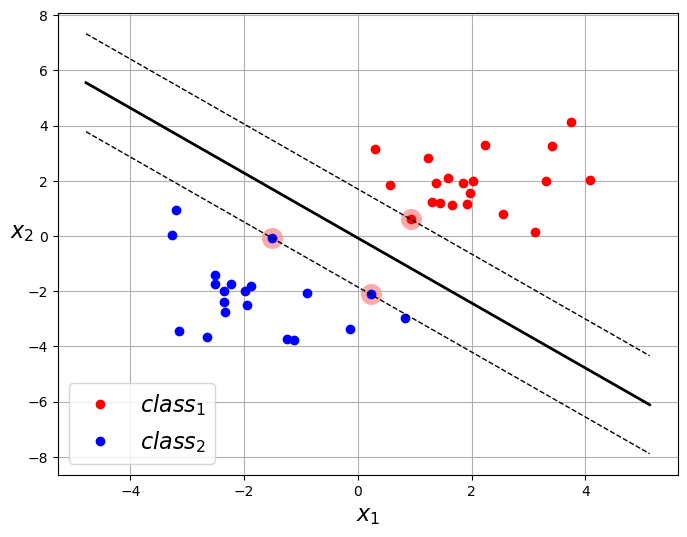

In [10]:
## Step 2: Plot the resulting graph by calling the function "plot_support_vectors(...)" defined above
linear_plot(X, Y, mod1)

**Space of Improvements**:

This is just a simple way of implementing the Linear SVM classifier. In the real-world, it is always recommended to standardize the data first before applying the SVM model, especially if it is the `LinearSVC` class and `SVC` class using the *kernel trick* (setting the hyperparameter `kernel` to be "poly"). The latter case is what we will apply in the next question.

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


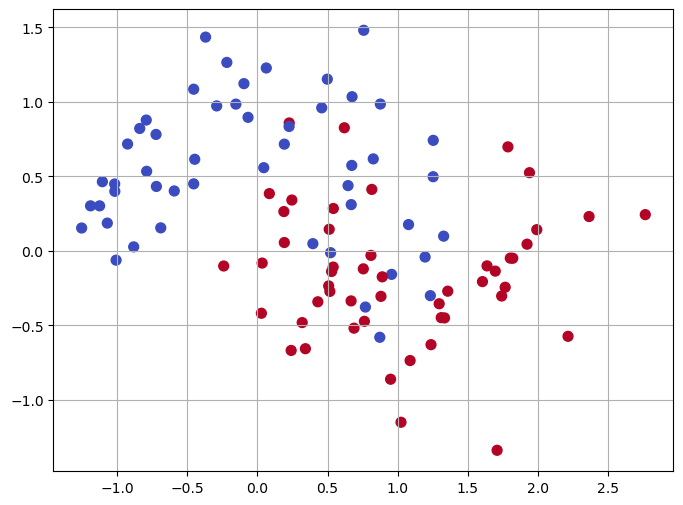

In [11]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

This question is just a simple repetition of the previous one, except for reporting the accuracy score, obtained by the `score` attribute specific to each scikit-learn estimator class (in this case the SVM estimator class). However, in this problem setting, several things change: First, we introduce the `Pipeline` class since this dataset2 is not a simple linear classification task as before (as can be seen by the above dataset graph). Also, as said before, it is always recommended to scale the dataset first (an important point: feature engineering) before applying the model. 

Second, we change our hyperparameter `kernel` to "poly", since in this case a classification using the polynomial kernel will be more appropriate (by looking at the graph of the original dataset above). The final thing we want to mention is the hyperparameter `coef0`, which "controls how much the model is influenced by high- degree polynomials versus low-degree polynomials" [1]. In other words, higher `coef0` will result in bigger bias and more complex decision boundary (overfitting); otherwise smaller bias and simpler decision boundary (underfitting). So, `coef0` acts much like the hyperparameter `C` in this situation.

For other hyperparameters, we set `degree = 3` (default argument), and `coef0 = 1` to make it consisent to *Chapter 5, Support Vector Machines, Hands_On_Machine_Learning_with_Scikit_Learn_and_TensorFlow* because the dataset outlook and the correspodning situation look similar (even though some differences) to the dataset used in the section "Polynomial Kernel" of the jupyter notebook [1]. (The default argument for `coef0` is 0.) Also, you can verify by simply deleting `coef0=1` that the separation is not as good as the one including the argument `coef0=1` (i.e., the separation line is even more upperleft, excluding more blue instances whose locations are only in the blue-instance areas, the upper left). Finally, please note that function `c_tune` calls the previous function `accuracy`, like what the function `linear_plot` did in the previous question.

(*Note that `coef0`, named **r** also, "controls how much the model is influenced by high- degree polynomials versus low-degree polynomials" [1]. In other words, `coef0` is a hyperparameter used to control the influence of the model's bias term r (also known as the intercept term) in the decision function.* If `coef0` value is too high, then it will lead to an overfitting case, while too low will result in the underfitting issue, So, `coef0` acts, to some extent, like what the hyperparameter `C` functions in the SVM Classifier.*)

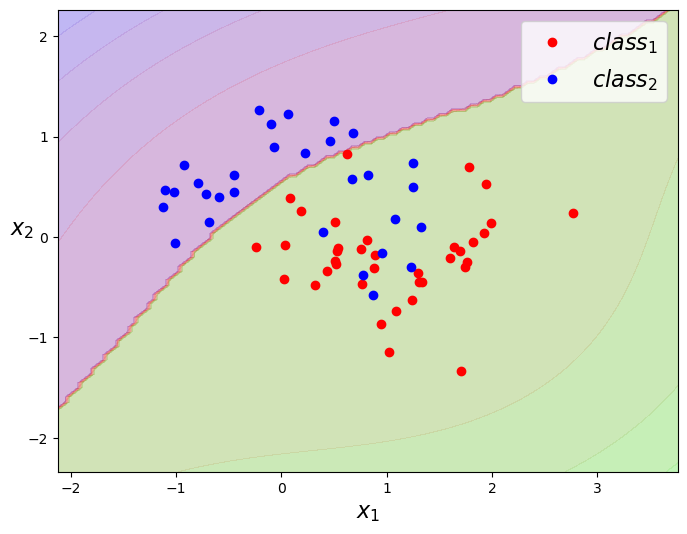

In [12]:
# Train SVM with soft margin with the "poly" kernel
## Step 1: Train SVM with soft margin on the training subset of dataset 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.01, random_state=42))
    ])
mod2 = svc2.fit(X_train, Y_train)

## Step 2: Visualize the separation under this new polynomial SVM classifier over the training set by defining a new 
## function "poly_plot(...)" first
### Define the function "poly_plot(...)"
def poly_plot(x, y, mod, size=16, loc="upper right"):
    """
    Input: x & y (original dataset); mod (model: either a class or a Pipeline); size (determing the "fontsize"
    under "plt.xlabel(...)", "plt.ylabel(...)", and "plt.legend(...)"); loc(a string type variable indicating the 
    location of the legend in the final graph)
    Output: None
    Function: Take the model (SVC or Pipeline assumed), the original dataset, and its class_name if applicable, 
    plot the classification result of the trained polynomial SVM so far.
    """
    #### Specify new instances "X" in this case
    x_min1, x_max1 = x.min()[0] - 1, x.max()[0] + 1
    x_min2, x_max2 = x.min()[1] - 1, x.max()[1] + 1
    x1 = np.linspace(x_min1, x_max1, 100)
    x2 = np.linspace(x_min2, x_max2, 100)
    x0, x1 = np.meshgrid(x1, x2)
    X = pd.DataFrame(np.c_[x0.ravel(), x1.ravel()], columns = ["x1", "x2"])
    
    #### Predict the labels for "X" and access the decision_boundary directly
    y_pred = mod.predict(X).reshape(x0.shape)
    y_decision = mod.decision_function(X).reshape(x0.shape)
    
    #### Plot the results
    plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "ro", label="$class_1$")
    plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bo", label="$class_2$")
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.xlabel("$x_1$", fontsize=size, rotation=0)
    plt.ylabel("$x_2$", fontsize=size, rotation=0)
    plt.legend(loc=loc, fontsize=size)
    
### Plot the result by calling the function "poly_plot(...)" directly
poly_plot(X_train, Y_train, mod2)
plt.show()

In [13]:
## Step 3: Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets
accuracy_train1 = mod2.score(X_train, Y_train)
accuracy_test1 = mod2.score(X_test, Y_test)
print("The accuracy score over the training set (in-sample) is: {:.4f}%.".format(100*accuracy_train1))
print("The accuracy score over the test set (out-of-sample) is: {:.4f}%.".format(100*accuracy_test1))

The accuracy score over the training set (in-sample) is: 83.5821%.
The accuracy score over the test set (out-of-sample) is: 81.8182%.


As can be seen above, the accuracy score on the test set drop to 81.8182% from 83.5821%. This is what our expect since the model never sees the new instances (test sets). However, it is possible to tune the hyperparameters to make our SVM classifier more robust. This is actually our task in the next question.

(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

In this case, we simply change our hyperparameter `C` to a set of possible values by making other hyperparameters fixed. Then, we train our SVM classifier again and obtain the validation accuracy score for each of `C`. Finally, we plot a graph showing the validation accuracy vs log(C) and obtain the best model, validation accuracy, and `C`.

In [14]:
# "C" hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import math

## Step 1: Define a function "c_tune(...)" to plot the graph of validation accuracy against Log(C) and obtain the best
## model (Pipeline), validation accuracy score, and "C"
def c_tune(x_train, y_train, x_vali, y_vali, c, plot=True, loc="lower right"):
    """
    Input: x_train & y_train (training sets); x_vali & y_vali(validation sets); c (a list containing all candidates 
    of the value for the hyperparameter "C"); loc(a string type variable indicating the location of the legend in the
    final graph); plot (a boolean variable indicating whether plot the graph or not)
    Output: The best model (Pipeline), validation accuracy, and the hyperparameter "C"
    Function: Take the training and validation sets, plot the graph of alidation accuracy against Log(C) (if "plot = 
    True", and "True" is the default value), and get the best model ("best_mod"), validation accuracy 
    ("best_accuracy"), and the hyperparameter "C" ("best_c").
    """
    ### Initialize variables of our interest and transform list "c" to "log(c)"
    accuracy_lst = [] 
    best_mod = None
    best_accuracy = -float("inf")
    best_c = None
    log_c = np.log(c)
    
    ### Iterate the list of "c" to record each validation accuracy score, and determine the best model, validation
    ### accuracy, and "C" at the same time
    for i in range(len(c)):
        svc = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=c[i], random_state=42))
        ])
        mod = svc.fit(x_train, y_train)
        accuracy_score = mod.score(x_vali, y_vali)
        accuracy_lst.append(accuracy_score)
        if accuracy_score > best_accuracy:
            best_mod = mod
            best_accuracy = accuracy_score
            best_c = c[i]
    
    ### Transform the type of "accuracy_lst" from "list" to "numpy.array" to make it consistent to "log_c", whose type
    ### was "numpy.array" already
    accuracy_lst = np.array(accuracy_lst)
    
    if plot:
        ### Begin our plotting
        plt.grid()
        plt.plot(log_c, accuracy_lst, "b-", linewidth=2, label="validation_accuracy")
        plt.xlabel("$log(C)$", fontsize=16, rotation=0)
        plt.ylabel("validation accuracy", fontsize=16, rotation=90)
        plt.legend(loc=loc, fontsize=16)
        
        ### Show the final graph
        plt.show()
    
    return (best_mod, best_accuracy, best_c)

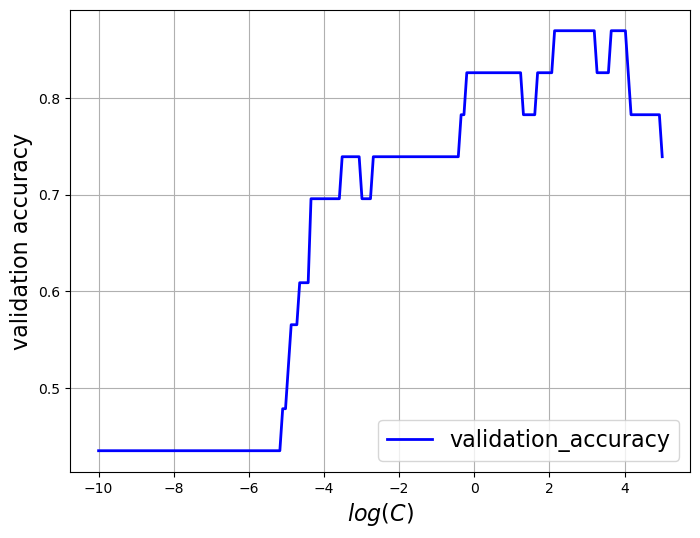

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf',
                  SVC(C=8.462785645688164, coef0=1, kernel='poly',
                      random_state=42))]),
 0.8695652173913043,
 8.462785645688164)

In [15]:
## Step 2: Plot the graph of validation accuracy v.s. Log(C) and report the best model, validation accuracy, and "C"
C = [math.exp(i) for i in np.linspace(-10,5,200)]
c_tune(X_train_1, Y_train_1, X_vali, Y_vali, C)

As can be seen, when `C` equals 8.4628 (approximately), the corresponding model outperforms others the best, which has a accuracy score equaling approximately 86.9565%. Moreover, as we can see, validation accuracy score generally goes up when `C` increases gradually. Note that this is not always the case if you setting different hyperparameters values for `degree` and `coef0` (you can try it if you want).

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [16]:
# Obtain the new out-of-sample accuracy over the test set while using the optimal C determined before
## Step 1: Select the optimal "C"
best_mod = c_tune(X_train_1, Y_train_1, X_vali, Y_vali, C, plot=False)[0]

In [17]:
## Step 2: Report the new out-of-sample accuracy
accuracy = best_mod.score(X_test, Y_test)
print("The accuracy score over the test set (out-of-sample) is: {:.4f}%.".format(100*accuracy))

The accuracy score over the test set (out-of-sample) is: 84.8485%.


As can be seen, when `C` equals 8.4628 (approximately), the corresponding model outperforms others the best, which has a accuracy out-of-sample score equaling approximately 84.8485%. This result is similar to the validation accuracy score, and this score over the test set is slightly higher than our previous one, which is 81.8182%. As a result, the `C` hyperparameter tuning kicks in effect in that it boosts the accuracy score on the validation set. 

Here I am just curious about the potential performance of the best model (`best_mod`) compared with pur previous model `mod2`. Let's try this out!

In [18]:
# Model comparisons over different types of dataset
## Step 1: Define a function called "model_plot(...)" to plot all of the performances of both models altogether over 
## the training, validation, and the test sets
def model_plot(x_train, y_train, x_vali, y_vali, x_test, y_test, original_mod, best_mod, size=18, loc="upper right"):
    """
    Input: All the training, validation, and testing sets; the previous model ("original_mod"); best model (
    "best_mod"); loc(a string type variable indicating the location of the legend in the final graph)
    Output: None
    Function: Take diffierent types of sets, plot the separation over them by the original model and the best model.
    """
    ### Inilialize a 3 * 2 subplots and the axes (to make the graph more beautiful)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharey=True)
    plt.axis([-2.2, 3.3, -1.6, 2.1])
    
    ### Iterate each subplot to plot each result correspondingly
    for i in range(len(axes)):
        if i == 0:
            x, y = x_train, y_train
            data_set_type = "Train"
        elif i == 1:
            x, y = x_vali, y_vali 
            data_set_type = "Validation"
        else:
            x, y = x_test, y_test
            data_set_type = "Test"
            
        plt.sca(axes[i][0])
        #### We call our previously defined fuunction "poly_plot(...)" here, the same trick as before!
        poly_plot(x, y, original_mod, size=size, loc=loc)
        if i == 0:
            plt.title(r"Original Model: $d = {}, r = {}, C = {}, {}$".format(
                original_mod.named_steps['svm_clf'].degree, original_mod.named_steps['svm_clf'].coef0,
                original_mod.named_steps['svm_clf'].C, data_set_type), fontsize=size+2)
        else:
            plt.title(r"${}$".format(data_set_type), fontsize=size+2)
        
        plt.sca(axes[i][1])
        #### The same trick!
        poly_plot(x, y, best_mod, size=size, loc=loc)
        if i == 0:
            plt.title(r"Best Model: $d = {}, r = {}, C = {:.4f}, {}$".format(
                best_mod.named_steps['svm_clf'].degree, best_mod.named_steps['svm_clf'].coef0,
                best_mod.named_steps['svm_clf'].C, data_set_type), fontsize=size+2) 
        else:
            plt.title(r"${}$".format(data_set_type), fontsize=size+2)
        plt.ylabel("")
        
    ### Show the final graph    
    plt.show()   

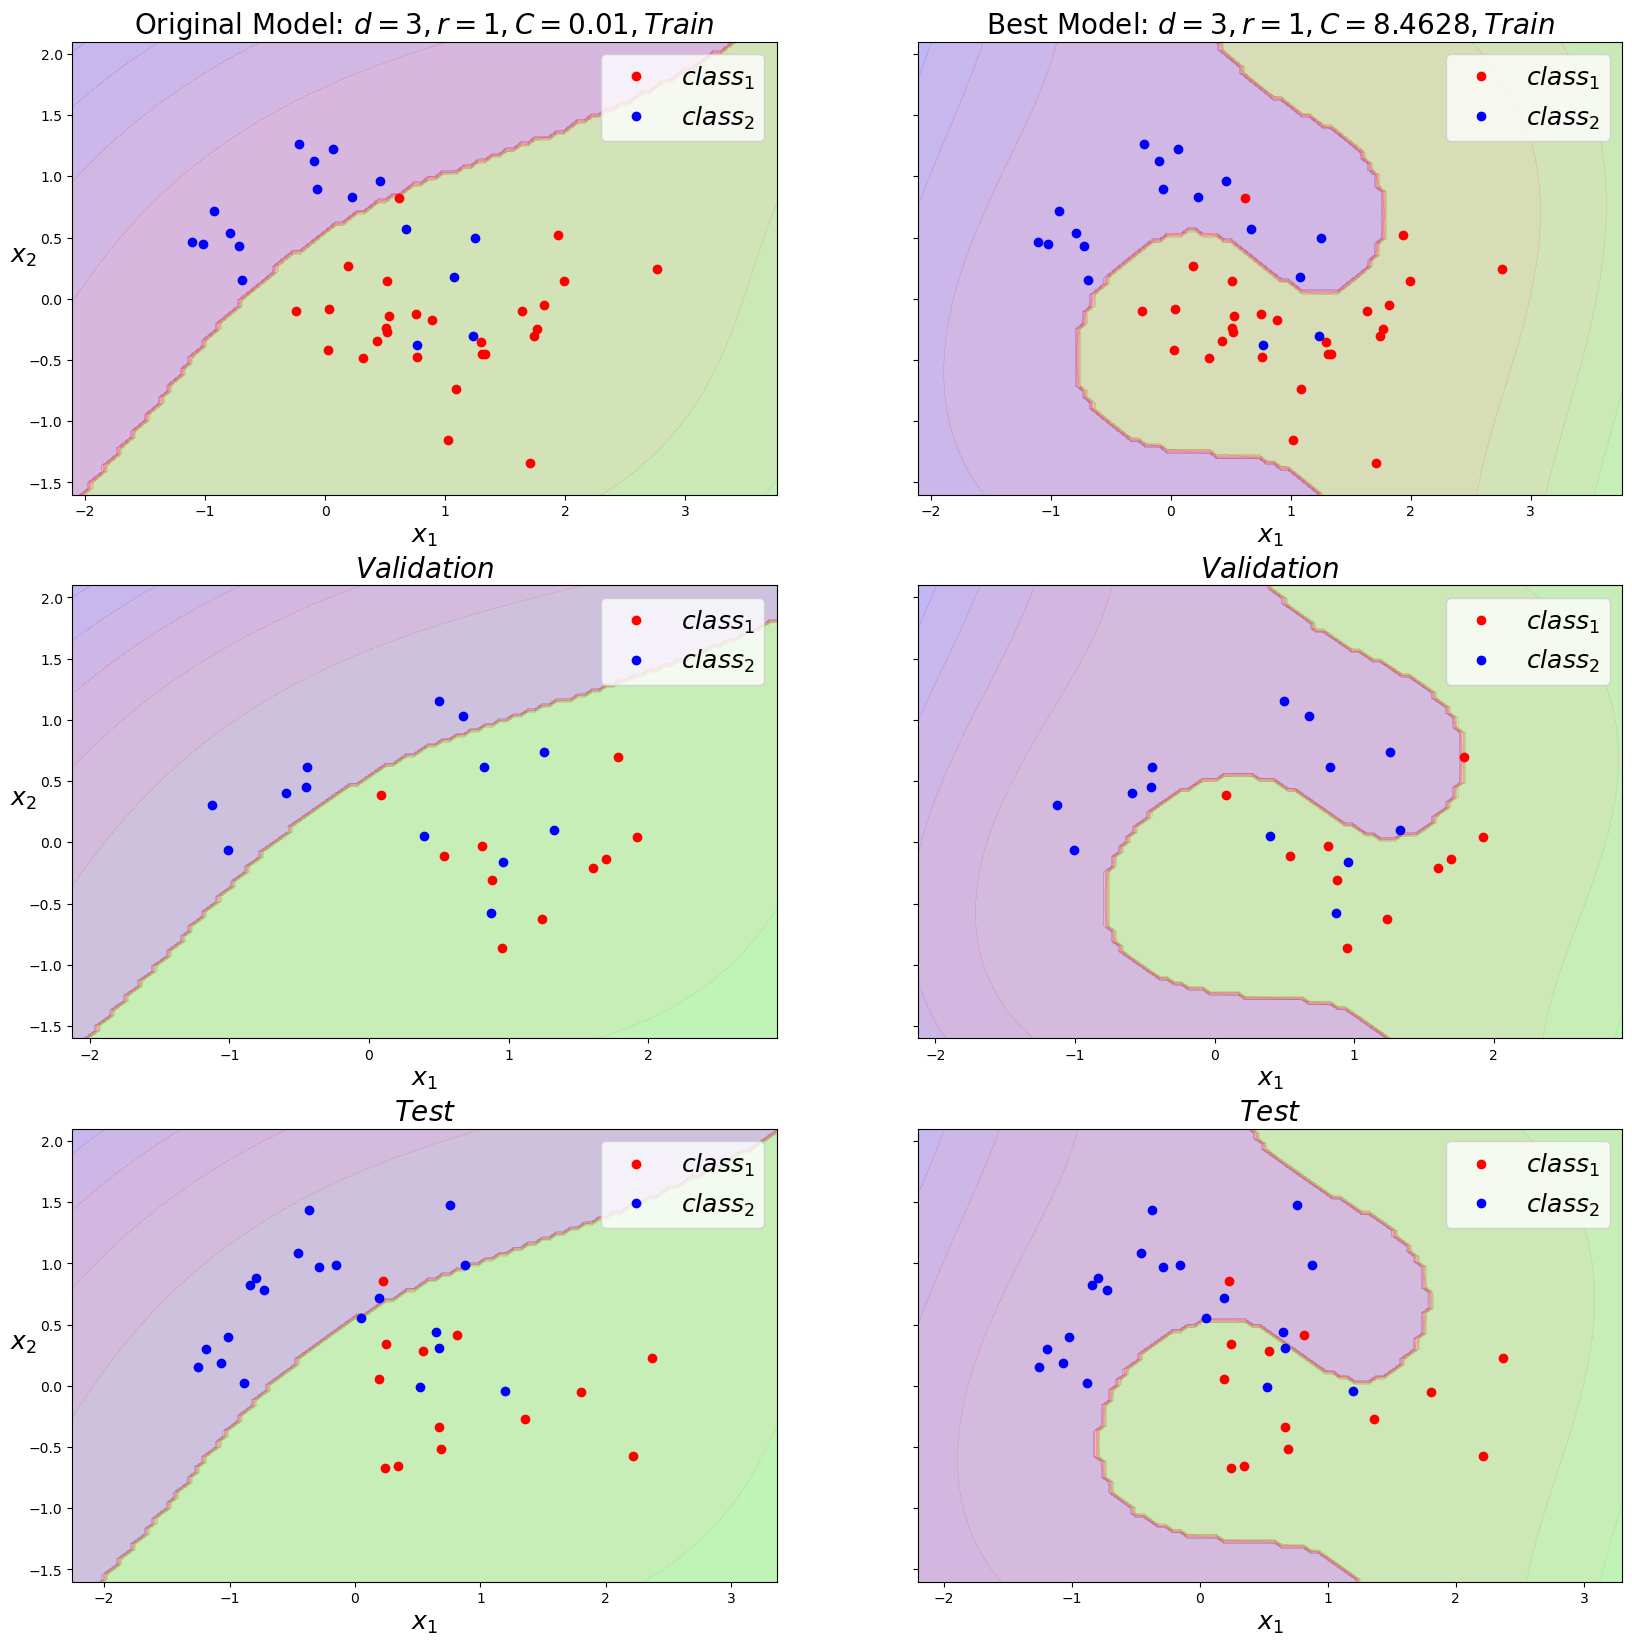

In [19]:
## Step 2: Get our graphs (i.e., 6 subgraphs) by calling the function "model_plot(...)" defined above directly
model_plot(X_train_1, Y_train_1, X_vali, Y_vali, X_test, Y_test, mod2, best_mod)   

By looking at the graph above, the original model (`mod2`) and the best model (`best_mod`) separate the two classes in a different manner. For the best model, the separation lines (all three lines from graphs on the right column) are more zigzag than the ones of the original model (all three lines from graphs on the left column) for any type of the dataset (i.e., training, validation, and test sets), making it more depend on the individual instances. In general, the original model roughly generalizes the classification over the two classes (similar to the classification of a linear SVM Classifier), resulting in a potential underfitting case, while the best model puts more weights on the individual instances (which should be expected since the hyperparameter `C` increases from 0.01 to 8.4628 roughly), probably leading to an overfitting situation. However, due to the fact that the out-of-sample accuracy score for the best model is approximately 84.8485%, and that the validation score of it is roughly 86.9565% (slightly higher, reasonable as well), the overfitting issue does not occur or at least is not primary here. *In particular, both the original and the best models have the out-of-sample accuracy scores over 80%, meaning that overfitting is not a main problem since their accuracy scores on the test set do not drop much*. 


**Space of Improvements:**

Even though now we perform a more complicated SVM classifier (by using the standardization tool `StandardScaler` and tuning the hyperparmeter `C`) than the first linear one, we still have some space of improvements. As you might have already be noticed, the best model `best_mod` in this case might not be the global optimum since we only tuned the hyperparameter `C` in this case. There are at least two other hyperparameters, `degree` and `coef0` left for us to tune. Of course, everything goes from easy to difficult. Let us finish this task for our next question: "Task 3". 

Nevertheless, this short exercise practices training SVM Classifier with soft margin, tuning one hyperparmeter, ploting the graph, and generating some rudimentary report and conclusions based on what we have done so far. In conclusion, it shows a good idea on how to put the SVM Classifier with soft margin into application and sheds light on some of the power of the SVM classifier with soft margin, laying the foundation for the latter more challanging task (let us assume "Task 3" temporarily in this case).


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


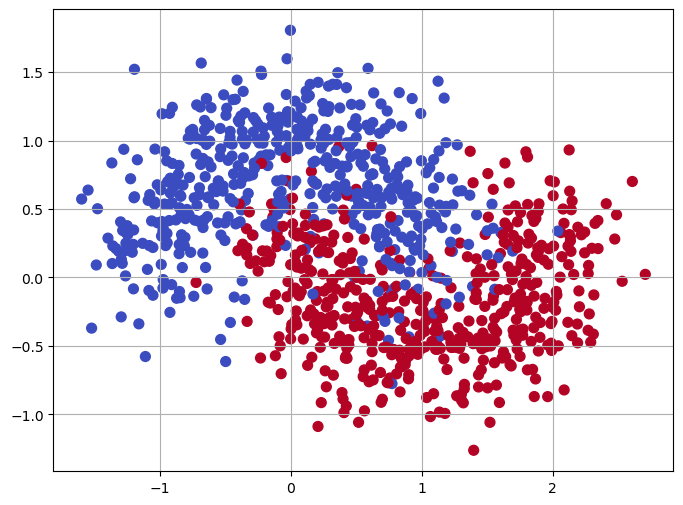

In [20]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

Here we use the default arguments (required by the question specifically) in the SVM polynomial kernal (i.e., `degree=3`, `coef0=0`, etc.) over the training set. This exercise is just a repetition of the previous one, even simpler since we do not need to specify `degree` and `coef0`. (Actually, for "Task 2", we do not need to enter `degree=3` since it is the default arguments.)

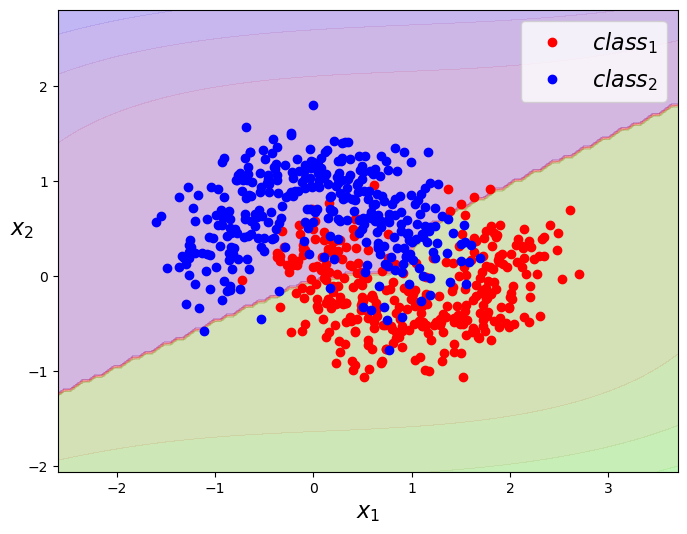

In [21]:
# Train SVM with the "poly" kernel over the training subset of dataset 3
## Step 1: Train SVM on the training subset of dataset 3
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", random_state=42))
    ])
mod3 = svc3.fit(X_train, Y_train)

## Step 2: Visualize the separation results by calling the function "poly_plot(...)" defined earlier
poly_plot(X_train, Y_train, mod3)
plt.show()

In [22]:
## Step 3: Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets
accuracy_train2 = mod3.score(X_train, Y_train)
accuracy_test2 = mod3.score(X_test, Y_test)
print("The accuracy score over the training set (in-sample) is: {:.4f}%.".format(100*accuracy_train2))
print("The accuracy score over the test set (out-of-sample) is: {:.4f}%.".format(100*accuracy_test2))

The accuracy score over the training set (in-sample) is: 83.5821%.
The accuracy score over the test set (out-of-sample) is: 87.8788%.


This is a relatively interesting situation: the accuracy score over the test set (87.8788%) is bigger than over the training set (83.5821%). This means that the model `mod3` generalizes well to the new, unseen data and overfitting is definitely not an issue here. However, it is better to tune our hyperparameters in the next step to achieve even the better result. Moreover, this phenomenon might also be due to random choice or the specific distribution from a particular density function of data in the training and test data. So, it is a good idea to evaluate the model's performance later.

(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

Here we define a new function `hyper_tune` storing the optimal (best) model, the whole big lists containing all avaliable values of the hyperparameter `C` (and hence `log(C)`) and validation accuracy scores (both 2 dimensional since we want to account for each level of degrees). Note that this new function looks similar to the previous function `c_tune`, but is significantly different in several ways.

First, we do not plot the graph alogether with obtaining the returned variables to make each function more focus on a specific task. Second, there is no input `c` like what the function `c_tune` did before since in this case each hyperparameter `C` is determined by each level of degrees (so each `C` is automatically calculated by each `degree`). Third, there is an additional loop in this function, indicating we should record each list (i.e., `big_accuracy_lst` and `C_lst`) in 2 dimensional since it is a good idea to separately store each `C` and validation accuracy value in a sublist for each level of degrees. 

(*Note that we discard the considerations for the hyperparameter `coef0` in this situaton for simplicty and for the computer's running time efficiency. In real-world applications, it is recommended to consider `coef0` as well and get the 3 or more dimensional dataset(s).*)

In [23]:
# "degree", C" and "coef0" hyperparameters tuning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import math

## Step 1: Define a function "hyper_tune(...)" to obtain the best model, the corresponding log(C) 2-dimensional list
## and the whole accuracy list which has the same dimension as log(C)
def hyper_tune(x_train, y_train, x_vali, y_vali, poly = [1, 2, 3, 4]):
    """
    Input: x_train & y_train (training sets); x_vali & y_vali(validation sets); poly (a list [1, 2, 3, 4] default);
    Output: The best model (Pipeline); the whole accuracy list for each degree; and log(C), where C contains all of 
    the C elements for each degree
    Function: Take the training and validation sets, determine the best model by iterating over "poly"; note that 
    C is automatically created for each entry in "poly".
    """
    ### Initialize variables of our interest and transform list "c" to "log(c)"
    big_accuracy_lst = []
    accuracy_lst = [] 
    best_mod = None
    best_accuracy = -float("inf")
    C_lst = []
    
    ### Iterate the list of "poly" to compute the corresponding C list for each one, and record each validation 
    ### accuracy score, and determine the best model
    for degree in poly:
        C = [math.exp(i) for i in np.linspace(-10,2*degree,200)]
        C_lst.append(C)
        for i in range(len(C)):
            svc = Pipeline([
                ("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="poly", degree=degree, C=C[i], random_state=42))
            ])
            mod = svc.fit(x_train, y_train)
            accuracy_score = mod.score(x_vali, y_vali)
            accuracy_lst.append(accuracy_score)
                
            if accuracy_score > best_accuracy:
                best_mod = mod
                best_accuracy = accuracy_score
                
        #### We need to initialize "accuracy_lst" after each iteration of "C" to match the dimensions of "C_lst"    
        big_accuracy_lst.append(accuracy_lst) 
        accuracy_lst = []    
    
    ### Transform the type of "accuracy_lst" from "list" to "numpy.array" to make it consistent to "log_c", whose type
    ### was "numpy.array" already
    big_accuracy_lst = np.array(big_accuracy_lst)
    C_lst = np.log(C_lst)
    
    return (best_mod, big_accuracy_lst, C_lst)


In [24]:
## Step 2: Obtain the best model ("opt_mod"), big accuracy list ("acurr_lst") , and the whole log(C) list (
## "c_lst") by calling the function "hyper_tune(...)" defined above directly
opt_mod, acurr_lst, c_lst = hyper_tune(X_train_1, Y_train_1, X_vali, Y_vali)

(2)
b.

Now we plot the graph of validation accuracy against log(C) for each level of degrees. Note that by taking most of the outputs (i.e., `acurr_lst`, and `c_lst`) from the function `hyper_tune` defined above, we achieve this in a new function called `plot_accuracy_c_degree`, whose usage of the subplot plotting method is different than that of the previously defined function `model_plot`. 

(*Note that the subplotting method in this case is great if you do not want to force the ranges of the y coordinates to be same for each subplot, while the one in the previous function `model_plot` is great if you subplot each subgraph with the same ranges of y coordinates.*)

In [25]:
## Step 3: Plot the result
### Define a function " plot_accuracy_c_degree(...)" separately to plot "Accuracy over Log(C)" for each degree
def plot_accuracy_c_degree(acurr_lst, c_lst, poly=[1,2,3,4], nrows=2, ncols=2, dim1=20, dim2=15, loc="lower right"):
    '''
    Input: acurr_lst (the whole list of the validation accuracy, 2 dimensional since accounting each degree);
    c_lst (the whole list of the log(C), the same dimension as "acuur_lst"); all of the other default inputs (e.g.,
    polynomial degree list "poly")
    Output: None
    Function: Take the whole accuracy and log(C) list as given, plot the graph of validation accuracy against log(C)
    for each degree
    '''
    #### Begin our plotting
    plt.figure(figsize=(dim1, dim2))
    
    #### Iterate over each 
    for num in poly:
        accur_lst_i = acurr_lst[num - 1]
        c_lst_i = c_lst[num - 1]
        plt.subplot(int(str(nrows)+str(ncols)+str(num)))
        plt.grid(True, which="both")
        plt.plot(c_lst_i, accur_lst_i, "b-", linewidth=2, label=r"$degree = {}$".format(num))
        plt.xlabel("$log(C)$", fontsize=16, rotation=0)
        if num % 2 != 0:
            plt.ylabel("validation accuracy", fontsize=16, rotation=90)
        plt.legend(loc=loc, fontsize=16)
    
    #### Show the final graph    
    plt.show()

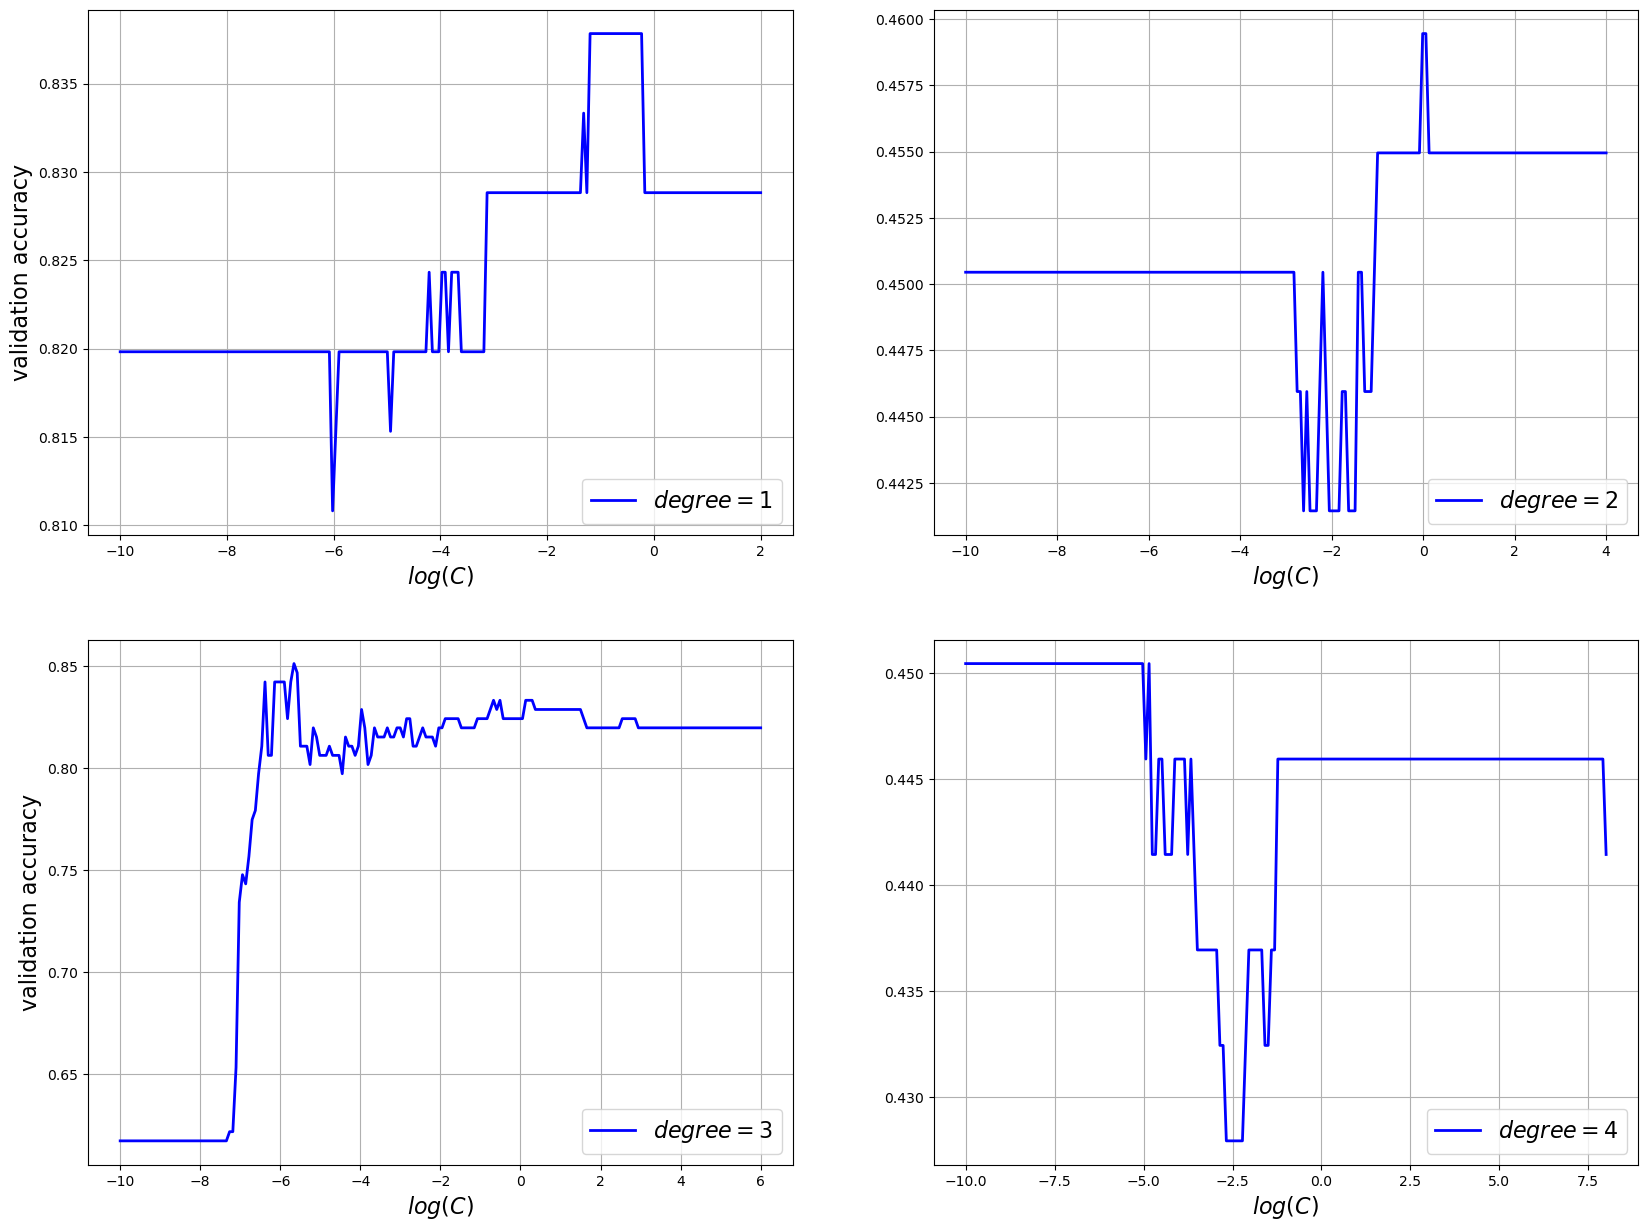

In [26]:
### Show the corresponding result by calling the function " plot_accuracy_c_degree(...)" defined above
plot_accuracy_c_degree(acurr_lst, c_lst)


By looking at the graph above, choosing `degree=3` obviously give the optimal claasification result based on the validation accuracy score. However, the corresponding log(C) is around -5 and -6,(closer to -6 however). We need to pick the optimal C, not the optimal log(C). This can be done in two ways: 

(1) Use the following command `opt_c = float(c_lst[acurr_lst == np.max(acurr_lst.max())])`, and then transfer this value back to `C` using `np.exp(best_c)` (Note that in the real code applications we combine these two steps altogether);

(2) Use a function to store the optimal (best) model (have already been achieved by our previously defined function `hyper_tune`, which stores the optimal model automatically);

And this second way corresponds exactly the criterion followed by the four graphs shown above: finding the optimal `C` and `degree` by picking out the highest validation score among all avaliable degrees and `C`.

In [27]:
## Step 4: Pick the optimal "degree" and "C"
### Method 1
opt_d1 = 3 #### Obvioulsy from the graphs above
opt_c1 = float(np.exp(c_lst[acurr_lst == np.max(acurr_lst.max())]))

### Method 2
opt_d2 = opt_mod.named_steps["svm_clf"].degree
opt_c2 = opt_mod.named_steps["svm_clf"].C

#### Check whether these values equal to each other
print(opt_d1 == opt_d2, opt_c1 == opt_c2)


True True


Ok, these two methods return the same result, which validates our expectation!

In [28]:
## Step 5: Report the optimal "degree" and "C" hyperparameters
print("The optimal degree is {};\nThe optimal C is {:.4f}.".format(opt_d1, opt_c1))

The optimal degree is 3;
The optimal C is 0.0035.


Actually, it does not matter which optimal degrees you chose (i.e., `opt_d1` or `opt_d2`), and which optimal `C` you take (i.e., `opt_c1` or `opt_c2`) since their values are always going to be the same as each other.

(3)

In [29]:
# Report the new out-of-sample accuracy
opt_accuracy = opt_mod.score(X_test, Y_test)
print("The accuracy score over the test set (out-of-sample) is: {:.4f}%.".format(100*opt_accuracy))

The accuracy score over the test set (out-of-sample) is: 85.1515%.


The accuracy score (85.1515%) over the test set is a little bit of lower than the default arguments (87.8788%). This situation can occur sometimes since our selection criterion is only based on the highest validation accuracy score, and we even have not used the `GridSearch` class with cross validation to further tune our hyperparameters. Moreover, there is a limited range of the values possible of the hyperparameter `C` corresponding to each level of degrees (i.e. `C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]`). Finally We did not consider some other hyperparameters like `coef0` in this case for simplicity either. Due to these limits, it is ok for us to gain a lower out-of-sample accuracy score of the tuned model than the previous untuned one. *However, it should be expected that these accuracy scores should have close value to each other, even though one of them might be a little bit of lower than the other.*

Let us plot the performances of the optimal model here (`opt_mod`) and the untuned one (`mod3`), like what we did before! But we should expect that both models produce similar results based on the avaliable information so far.

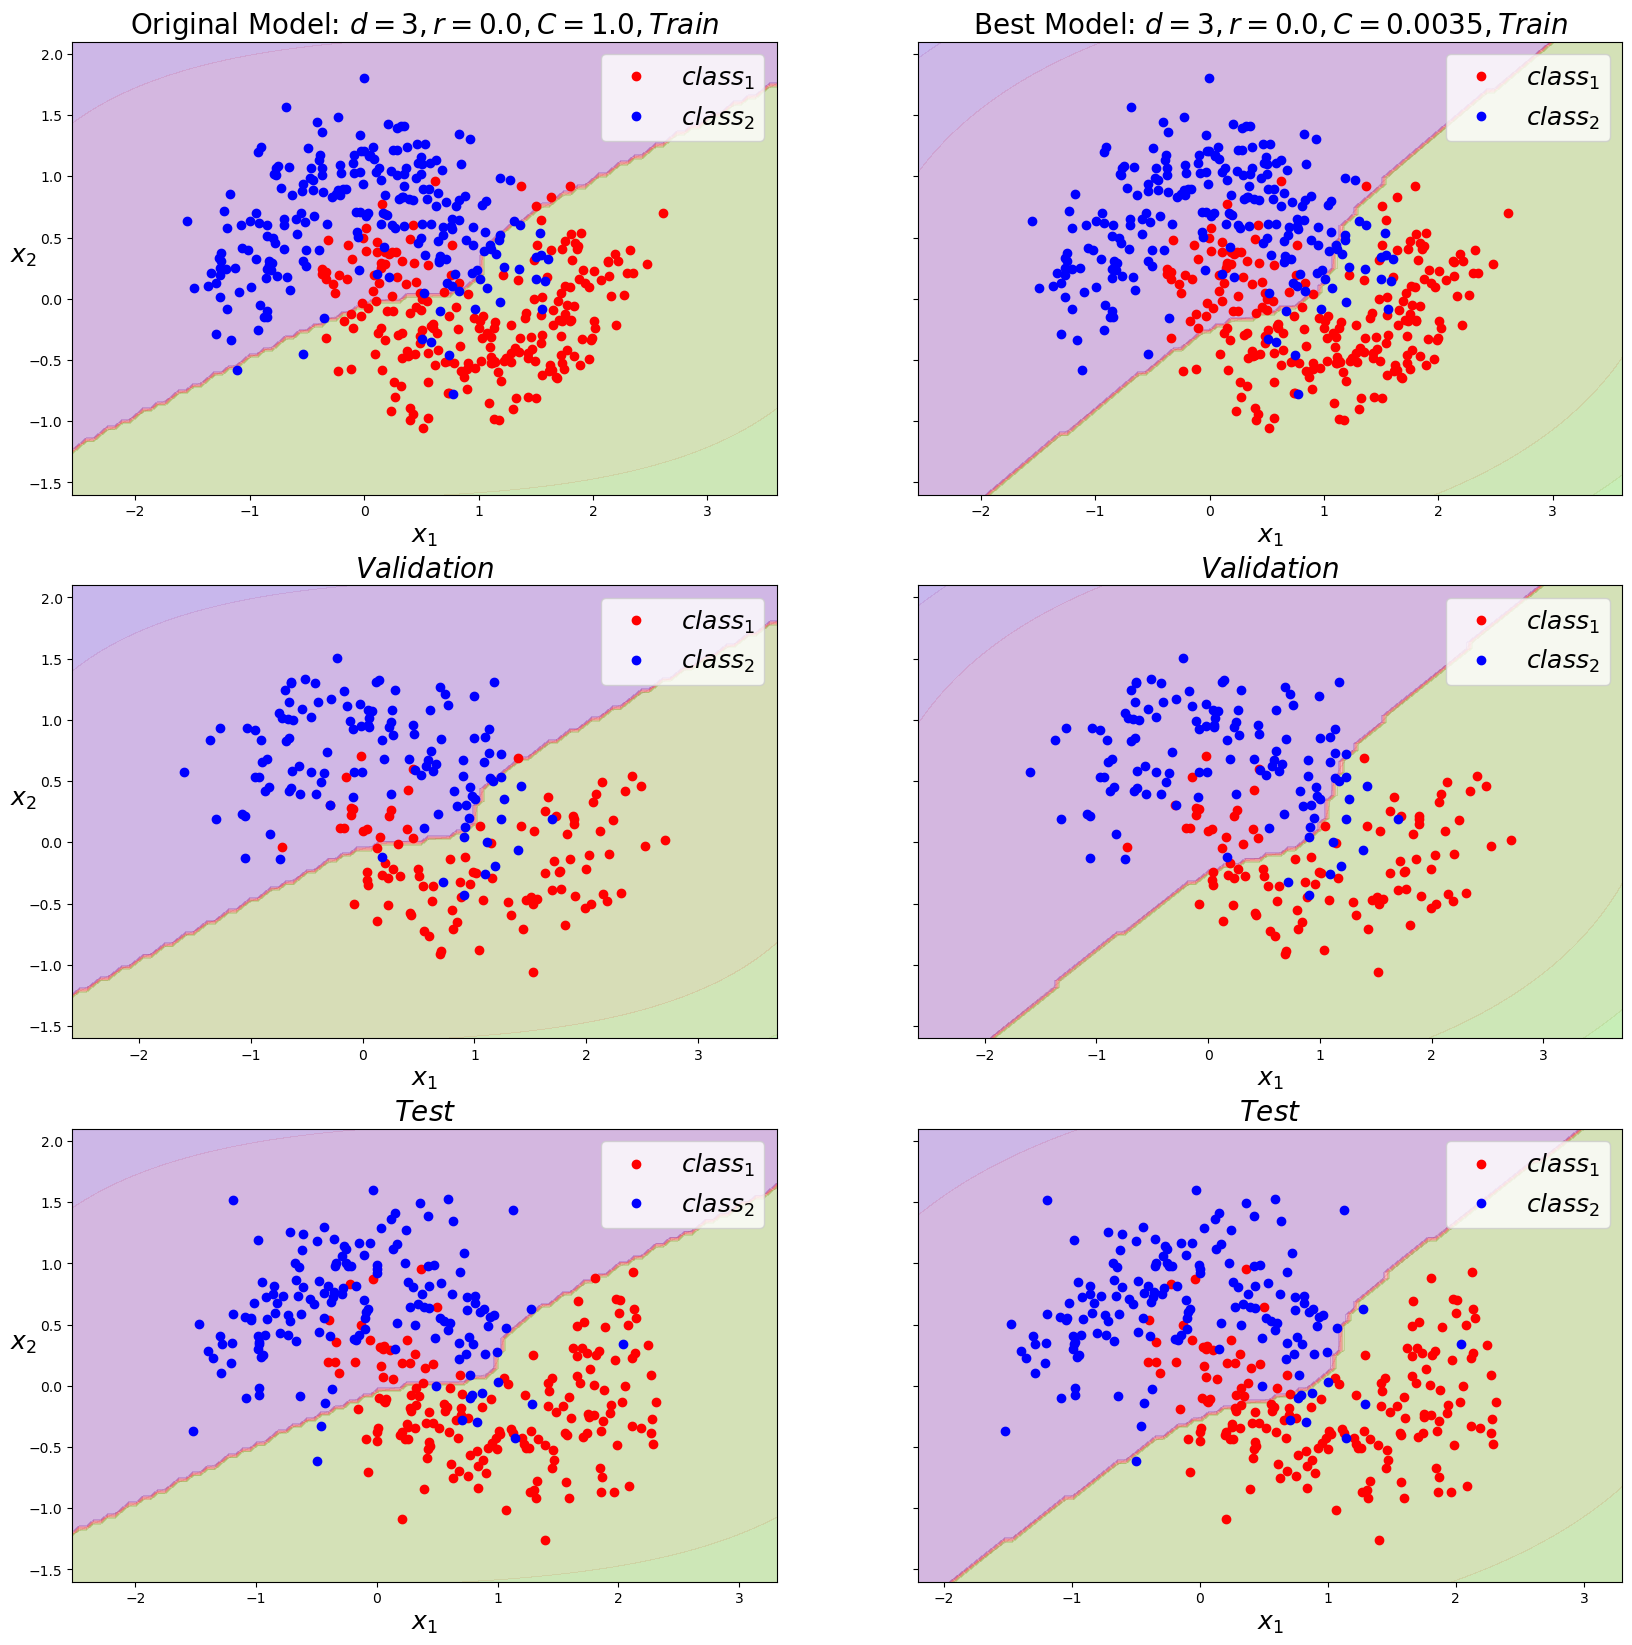

In [30]:
# Model comparisons over different types of dataset by directly calling the previously defined function "
# model_plot(...)"
model_plot(X_train_1, Y_train_1, X_vali, Y_vali, X_test, Y_test, mod3, opt_mod) 

It can be seen that both models return the pretty similar results, which is what we expect given their out-of-sample accuracy score are close, even though for the tuned mode (the optimal model) it is slightly lower.

**Space of Improvements:**

In future, we could use the `GridSearch` class with different values of cross-validation to tune our hyperparameters and try out a number of different performance metrics (e.g., precision, recall, F1 score, etc.), instead of only using the accuracy score in this project. It is better for us to consider more different types of hyperparameters and a wider range of values for each of them, and then we gradually shorten our focus to pinpoint the possible optimal model, trying our best. This way can largely improve our the model's performance as a result.